# Аналитика данных с помощью pandas и matplotlib

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.

Минимальные баллы для зачёта по этой работе - 1 балл. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд<br> (см. слайды с семинара №1)

 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## 1. Данные (2 балла)

Начнем с необходимых приготовлений.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

%matplotlib inline

/home/ask/.local/lib/python3.10/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [2]:
# Paste your code here.
coins = pd.read_csv("coins.csv", index_col='date')

Посмотрим что получилось

In [3]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [5]:
coins['name'].nunique()
# При этом эта же операция над символами даёт 66, откуда разница --- загадка

70

#### 2. За какой период данные мы имеем? (0.4 балла)

In [9]:
pd.to_datetime(coins.index.max())-pd.to_datetime(coins.index.min())

Timedelta('1865 days 00:00:00')

#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? (0.5 балла)

In [10]:
coins.isnull().sum()

price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

#### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [11]:
coins.loc[(coins['price'] == coins['price'].max()), ['price', 'symbol', 'name']]

,price,symbol,name
date,,,
2017-12-17,19475.8,BTC,Bitcoin


#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

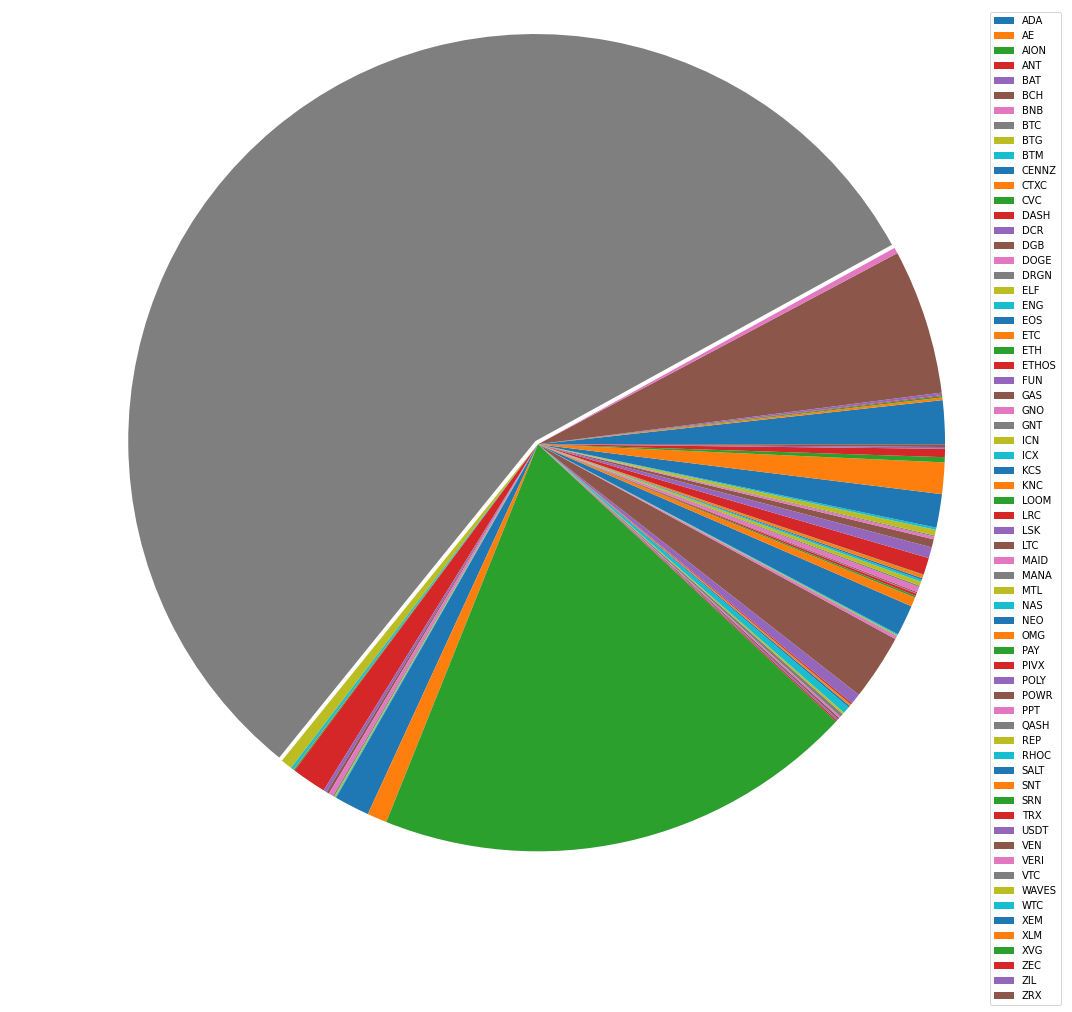

In [12]:
smth = coins.groupby('symbol')['market'].sum()
labels = smth.index
plt.figure(figsize=(15,15))
pathces, texts = plt.pie(
    smth,
    explode=(smth == max(smth))*0.01
)
plt.legend(pathces, labels)
plt.axis('equal')
plt.tight_layout()
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [14]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    # Paste your code here
    ohlc = coins.loc[(coins['symbol'] == symbol) & (pd.to_datetime(start_date) <= pd.to_datetime(coins.index)) & (pd.to_datetime(end_date) >= pd.to_datetime(coins.index)), ['open', 'high', 'low', 'close']]
    ohlc = ohlc.reset_index()
    ohlc['date'] = pd.to_datetime(ohlc['date'])
    ohlc['date'] = ohlc['date'].apply(mpl_dates.date2num)
    ohlc = ohlc.astype(float)
    
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111)

    candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

    ax.set_xlabel('Date')
    ax.set_ylabel('Price')

    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    plt.grid(True)
    plt.show()

Посмотрим, что получилось:

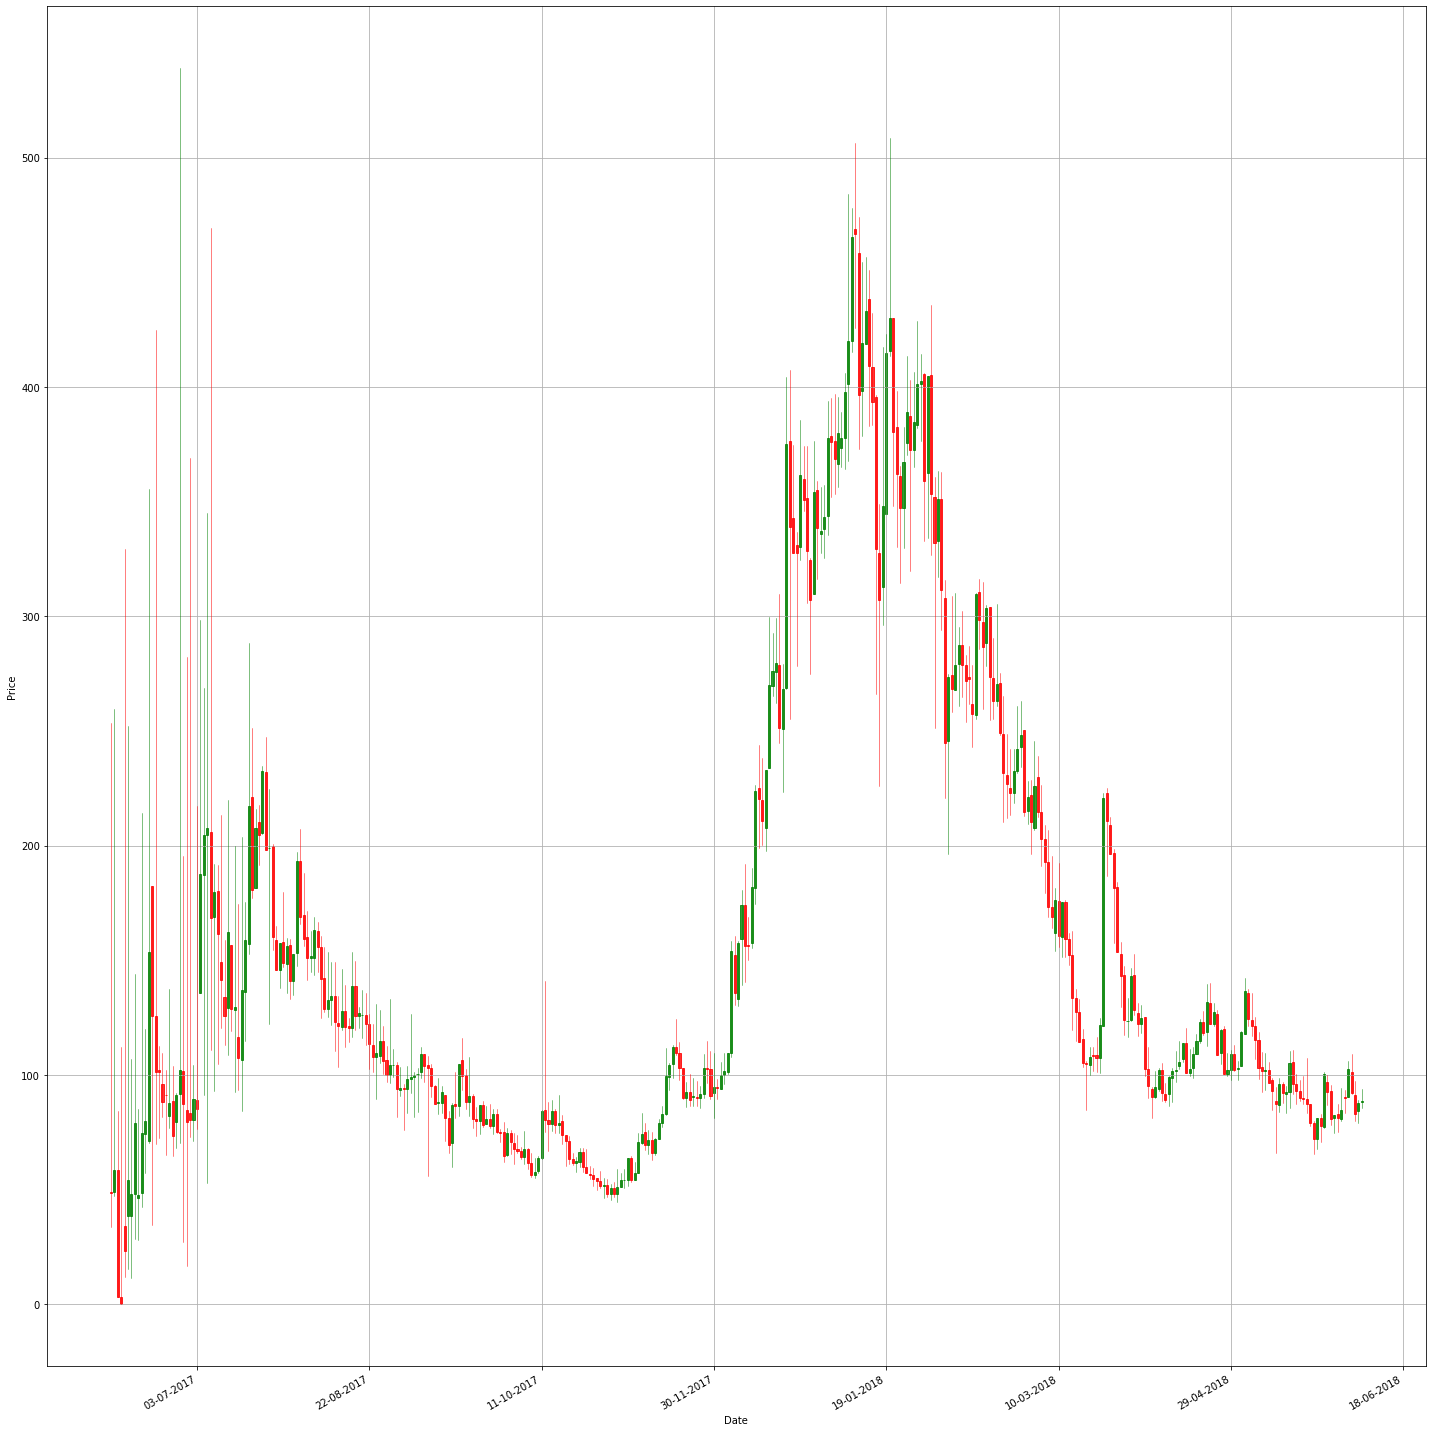

In [15]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [16]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    # Paste your code here
    current_coin = coins[(coins['symbol'] == symbol) & (pd.to_datetime(coins.index) >= pd.to_datetime(start_date)) & (pd.to_datetime(coins.index) <= pd.to_datetime(end_date))]
    current_coin['pnd'] = (current_coin['high'] / current_coin[['open', 'close']].max(axis=1))
    return current_coin.iloc[current_coin['pnd'].argmax()][['symbol', 'pnd']]

In [17]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

/tmp/ipykernel_11412/170502990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_coin['pnd'] = (current_coin['high'] / current_coin[['open', 'close']].max(axis=1))


symbol         BTC
pnd       1.142894
Name: 2017-11-29, dtype: object

#### Сравните эти значения для разных монет.

In [18]:
find_most_severe_pump_and_dump(coins, symbol='VERI', start_date='2017-06-01', end_date='2018-06-01')

/tmp/ipykernel_11412/170502990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_coin['pnd'] = (current_coin['high'] / current_coin[['open', 'close']].max(axis=1))


symbol         VERI
pnd       33.549254
Name: 2017-06-11, dtype: object

## 4. Окупаемость инвестиций (1 балл)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [19]:
def compute_roi(coins, investments, start_date, end_date):
    # Paste your code here
    start = 0
    end = 0 
    for key, value in investments.items():
        start += int(coins[(coins.index == start_date) & (coins['symbol'] == key)]['price']) * value
        end += int(coins[(coins.index == end_date) & (coins['symbol'] == key)]['price']) * value
    print((end-start) / start)

In [20]:
compute_roi(coins, investments={'BTC': 500, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

0.00382132033205956


In [21]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

57.89272030651341


## 5. Технический анализ (1 балл)

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение за N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [23]:
def plot_bollinger_bands(coins, symbol, window, width):
    X = pd.to_datetime((coins[(coins['symbol'] == symbol)].reset_index())['date'])
    price = coins[(coins['symbol'] == symbol)]['price']
    p_mean = price.rolling(window=window).mean()
    p_std = price.rolling(window=window).std()

    fig = plt.figure(figsize=(30, 30))
    ax = fig.add_subplot()

    ax.plot(X, price, color ='g', label='price')
    ax.plot(X, p_mean, color ='b', label='mean')
    ax.plot(X, p_mean+p_std, color ='r', linestyle ='--', label='Bollinger')
    ax.plot(X, p_mean-p_std, color ='r', linestyle ='--')

    ax.set_xlabel("Date")
    ax.set_ylabel("Amount")

    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    ax.legend()
    ax.grid(True)

    plt.show()

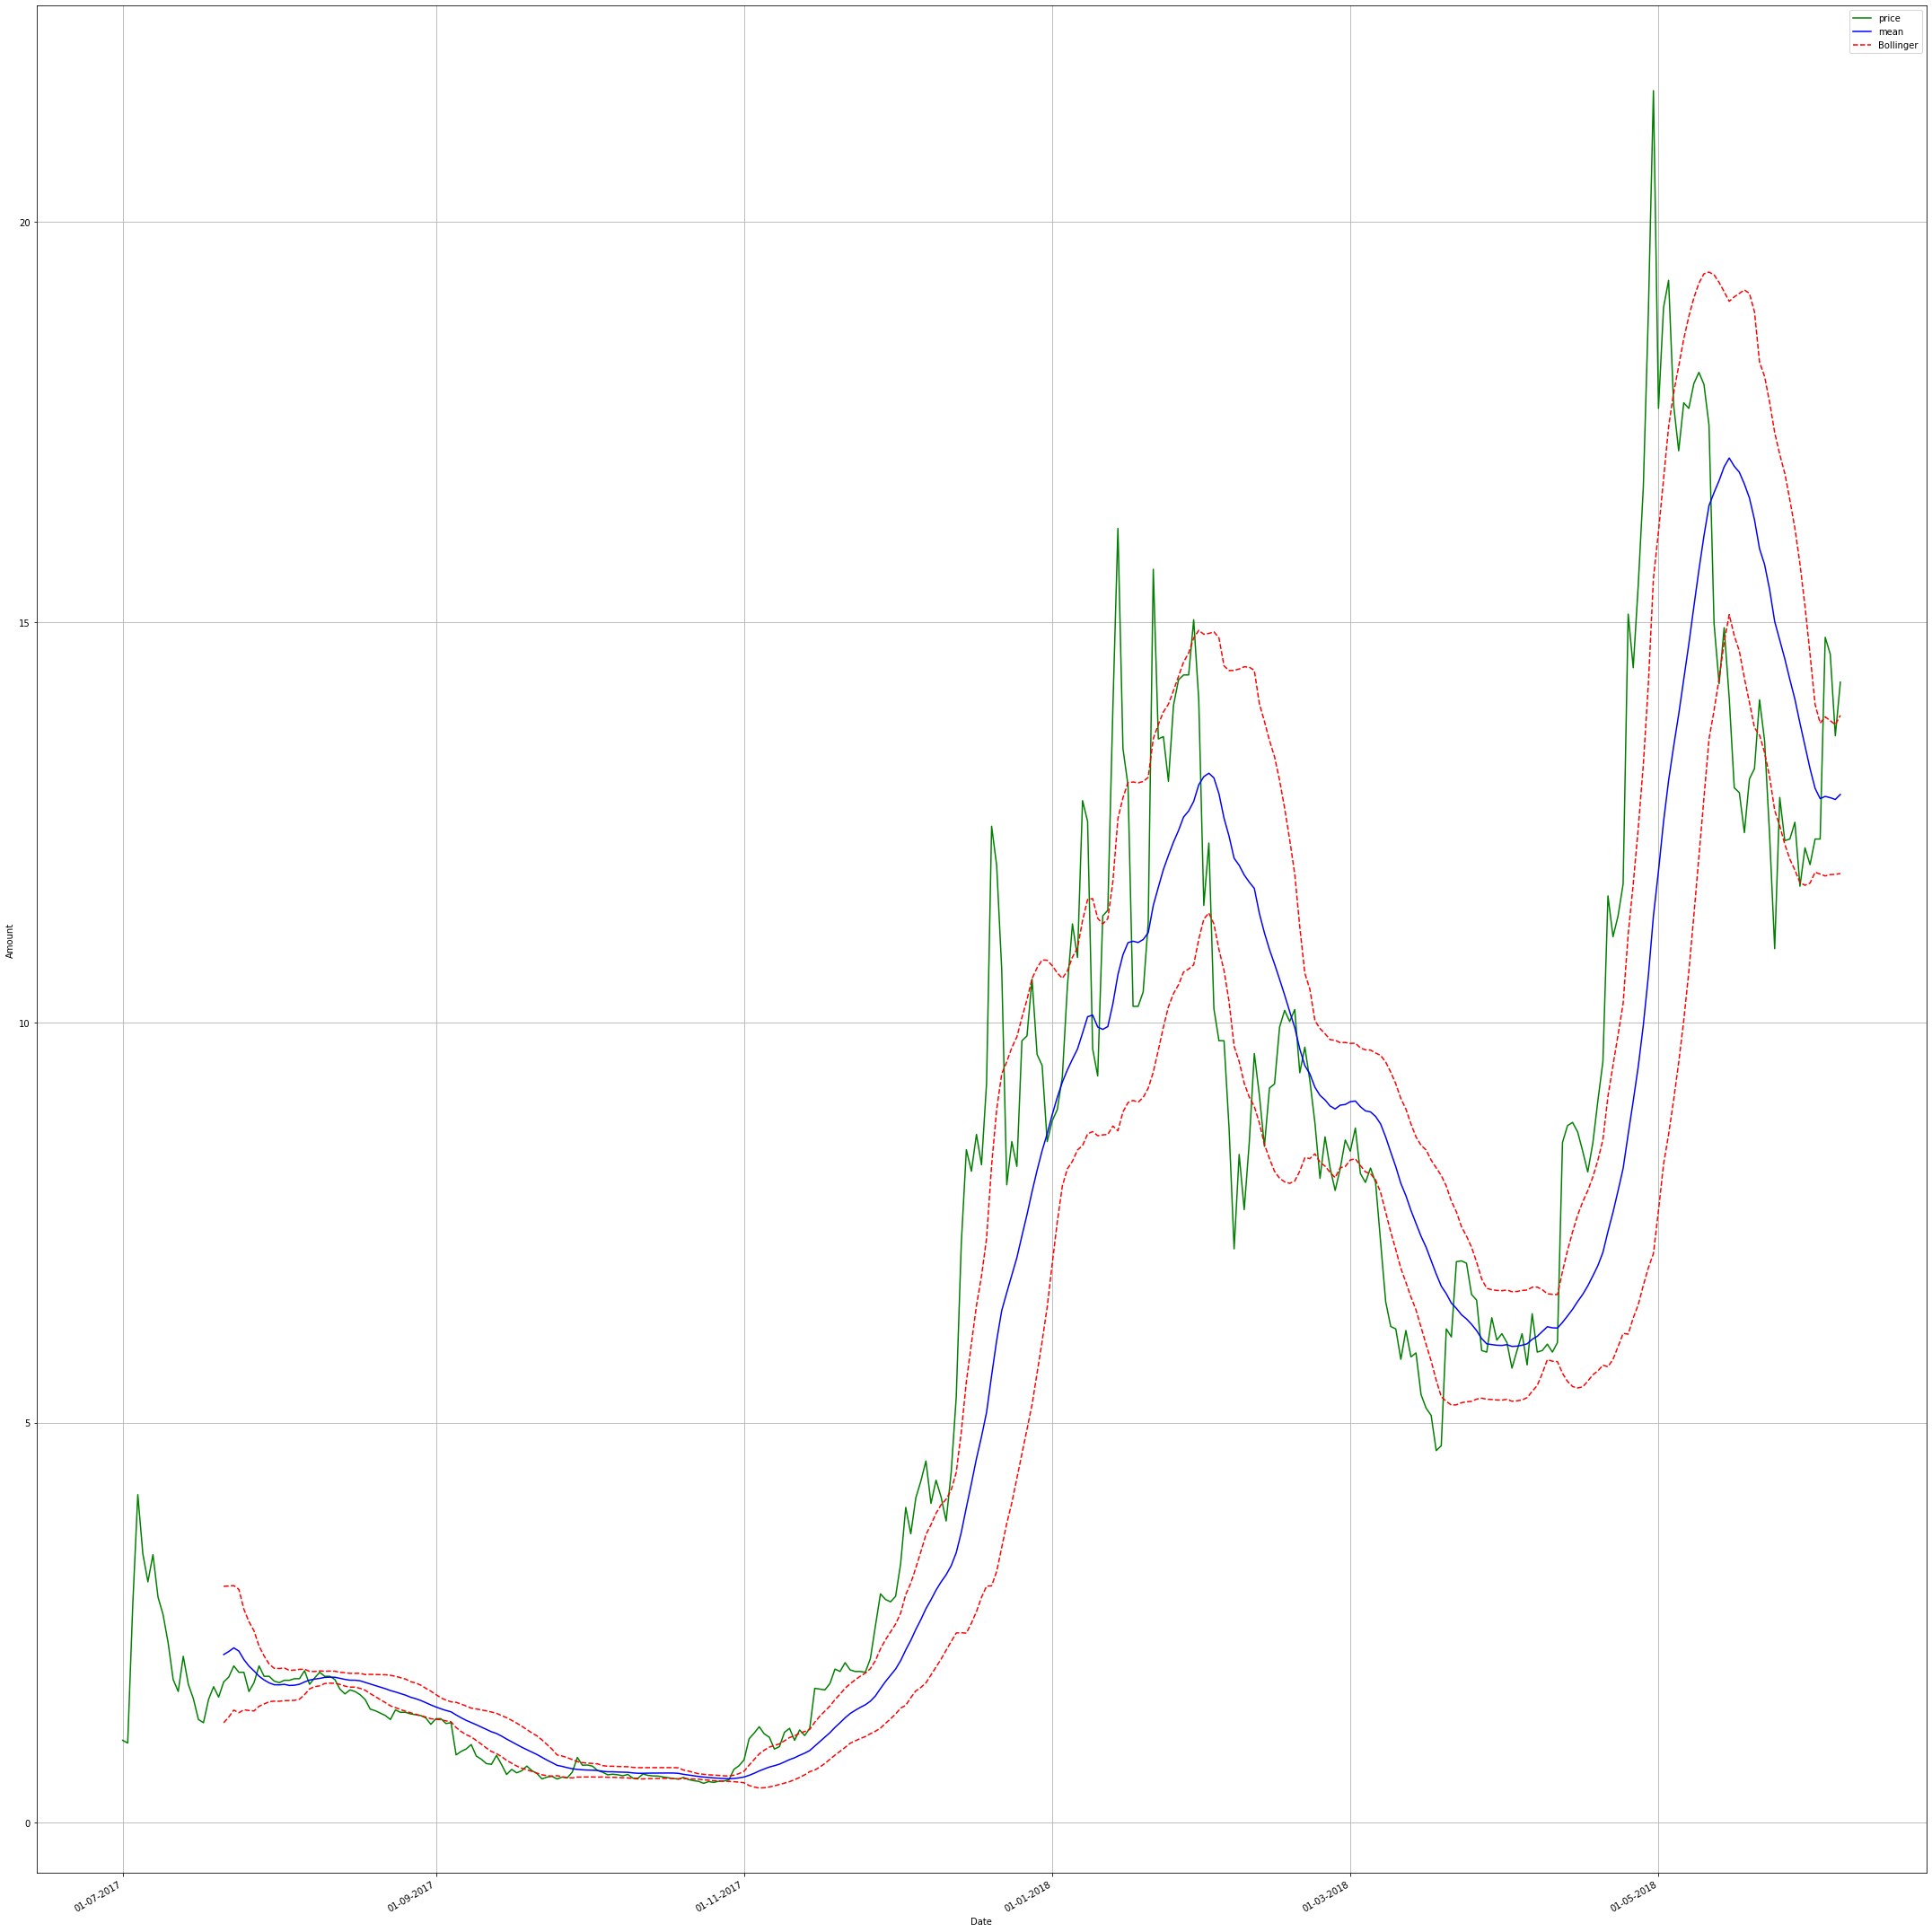

In [24]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

#### Сделайте вывод о том, выполнялось ли правило Боллинджера.

Правило Боллинджера не выполнялось в большинстве случае, но действительно пару раз были случаи отражения от границ, что скорее является случайным совпадением

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [25]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Paste your code here
    fig = plt.figure(figsize=(16, 9))
    fig.suptitle('Market as indiacator')

    ax = fig.add_subplot(1, 2, 1)

    for i in symbols:
        ax.plot(pd.to_datetime(coins.index[(pd.to_datetime(coins.index) >= pd.to_datetime(start_date)) & (coins['symbol'] == i)]), coins[(pd.to_datetime(coins.index) >= pd.to_datetime(start_date)) & (coins['symbol'] == i)]['market'], label=i)
    
    ax.set_xlabel("Date")
    ax.set_ylabel("Market")

    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)

    ax.legend()
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)

    for i in symbols:
        coin_group = coins[pd.to_datetime(coins.index) >= pd.to_datetime(start_date)].reset_index().groupby('date')
        ax.plot(pd.to_datetime(coins.index[(pd.to_datetime(coins.index) >= pd.to_datetime(start_date)) & (coins['symbol'] == i)]), coins[(pd.to_datetime(coins.index) >= pd.to_datetime(start_date)) & (coins['symbol'] == i)]['market'] / (coin_group.filter(lambda x: x['symbol'].isin([i]).sum() > 0).groupby('date')['market'].sum()), label=i)

    ax.set_xlabel("Date")
    ax.set_ylabel("Market")

    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)

    ax.legend()
    ax.grid(True)

    fig.autofmt_xdate()

    fig.tight_layout()

    plt.show()

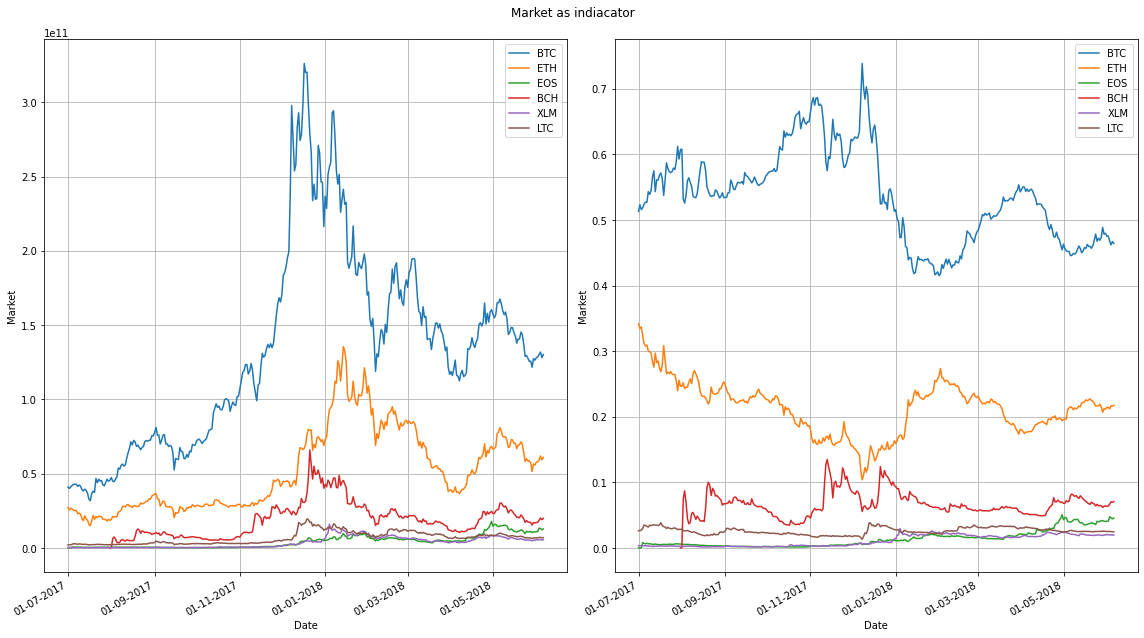

In [26]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

#### Проанализируйте зависимость доли капитализации альткойнов от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Биткоин -- одна изсамых популярных монет, ну или по крайней мере монета с наибольшей капитализацией, так что увеличение доли капитализации альткоинов негативно влияет на долю биткоина в первую очередь

## 7. Корреляции монет (1 балл)

#### Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

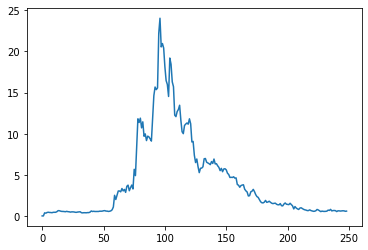

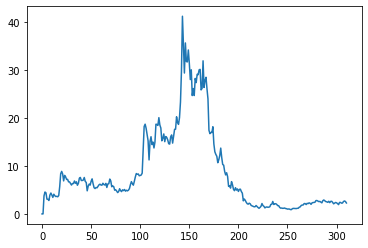

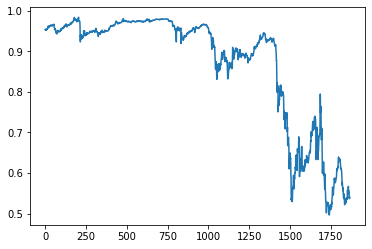

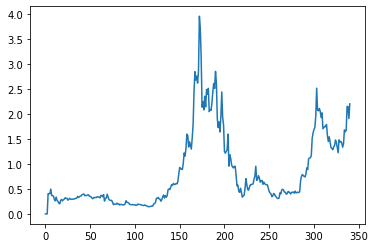

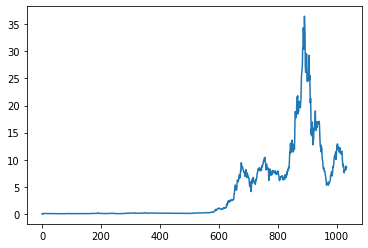

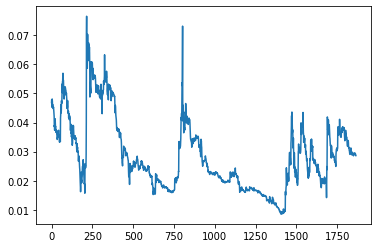

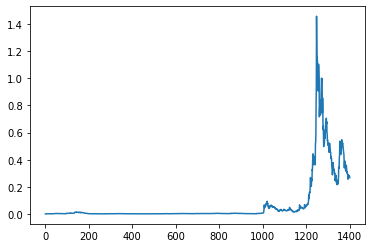

,0,1,2,3,4,5,6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.00000,NaN,NaN,-0.80191,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,-0.80191,NaN,NaN,1.00000,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here
    coins_wo_date = coins.reset_index()
    total_cap = []
    for name, group in coins_wo_date.groupby('date'):
        total_cap.append(group[group['symbol'].isin(symbols)]['market'].sum())

    total_cap = pd.Series(total_cap)
    coins_wo_date['date'] = coins_wo_date['date'].apply(pd.to_datetime)
    coins_wo_date = coins_wo_date.set_index('date')
    win_mart = coins_wo_date[(coins_wo_date['symbol'].isin(symbols))].groupby('symbol')
    smth = []
    for name, group in win_mart:
        smth.append((group.reset_index()['market']/total_cap).ewm(alpha=alpha, adjust=False).mean())
        (group.reset_index()['market']/total_cap).plot()
        plt.show()
    
    smth = pd.DataFrame(smth).T
    date_ind = pd.to_datetime(date) - pd.to_datetime(coins.index.min())
    return smth.iloc[(date_ind-pd.Timedelta(window, "d")).days:date_ind.days].corr()

calc_coins_correlations(coins, date="2018-06-06",
                                    symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                    window=21, alpha=0.1)

In [77]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

0       0.000000
1       0.000000
2       0.037326
3       0.067053
4       0.102275
          ...   
1861    0.625080
1862    0.625080
1863    0.625080
1864    0.625080
1865    0.625080
Length: 1866, dtype: float64
0       0.000000
1       0.000000
2       0.376596
3       0.796160
4       1.156324
          ...   
1861    2.400409
1862    2.400409
1863    2.400409
1864    2.400409
1865    2.400409
Length: 1866, dtype: float64
0       0.953139
1       0.953039
2       0.953210
3       0.953318
4       0.953180
          ...   
1861    0.548904
1862    0.548385
1863    0.547237
1864    0.546700
1865    0.545860
Length: 1866, dtype: float64
0       0.000000
1       0.000000
2       0.000000
3       0.040623
4       0.076897
          ...   
1861    1.704103
1862    1.704103
1863    1.704103
1864    1.704103
1865    1.704103
Length: 1866, dtype: float64
0       0.000000
1       0.010722
2       0.012197
3       0.013645
4       0.015433
          ...   
1861    9.021672
1862    9.021672


/tmp/ipykernel_4428/3415760175.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)
/home/ask/.local/lib/python3.10/site-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/ask/.local/lib/python3.10/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,0,1,2,3,4,5,6
0,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,1.00,nan,nan,-0.80,nan
3,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,nan,nan
5,nan,nan,-0.80,nan,nan,1.00,nan
6,nan,nan,nan,nan,nan,nan,nan


Довольно интересно ещё взглянуть на 2017-12-27:

In [65]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

1704 days 00:00:00


/tmp/ipykernel_4428/925846226.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)
/home/ask/.local/lib/python3.10/site-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/ask/.local/lib/python3.10/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,0,1,2,3,4,5,6
0,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,1.00,nan,nan,-0.63,nan
3,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,nan,nan
5,nan,nan,-0.63,nan,nan,1.00,nan
6,nan,nan,nan,nan,nan,nan,nan


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия основанная на скользящих средних. Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае. Посмотрим на пример

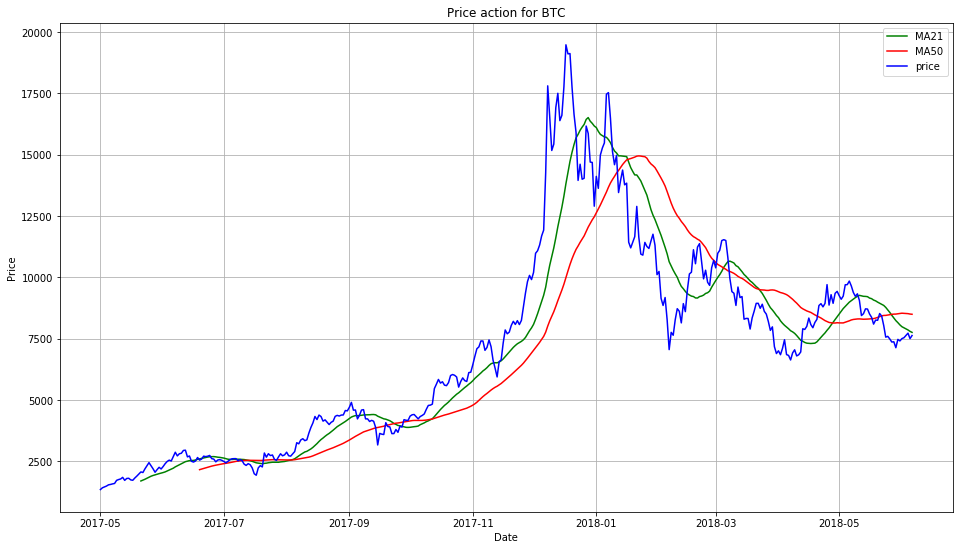

In [31]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.
#### Реализуйте функцию, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании 

#### Notes:
Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод shift(1) у Series.
Отношение цен закрытия за сегодня и за вчера - это мой multiplier за сегодняшний день. При этом давайте строить графики накопления для multipliers. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй- 0.5 и в третий 2. То график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).

При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый threshold (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [32]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

#### Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели.

## 9. Отказ от ответственности 
Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.